![zebra](images/zebra.jpg)

# 5. Módulo Matplotlib : Confecção de Gráficos

__Conteúdo__:

* 5.1. Plot Funcional (Formato Matlab) <br>
* 5.2. Plot Orientado a Objeto <br>
  * 5.2.1. Ferramentas Básicas <br>
  * 5.2.2. Razão de Aspecto e DPI (Dots per inch) <br>
  * 5.2.3. Salvando Figuras <br>
  * 5.2.4. Formatação de Texto :  _fontsize_, _font family_ , $\LaTeX$ e outros <br>
  * 5.2.5. Cores, Espessuras e Tipos de Linha <br>
  * 5.2.6. Formatação do eixo <br>
    * 5.2.6.1. Escala <br> 
    * 5.2.6.2. Riscos e _grids_ <br>
    * 5.2.6.3. Eixos gêmeos (_twins axes_) <br>

Existe, para _Python_, diversos módulos dedicados à visualização: _seaborn_,_matplotlib_,_ggplot_,_plotly_,_Altair_. No curso, utilizaremos  o _matplotlib_, devido à sua facilidade de implementação, suporte para LaTex, _outputs_ de alta qualidade, podendo ser salvos em qualquer formato. Inicialmente, devemos escolher a interface para ser utilizada no notebook. Utilizaremos a inline para deixar os gráficos no mesmo, sem abrir janelas.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np 

## 5.1. Plot Funcional (Formato MatLab)

O Plot Funcional é a maneira mais simples de se iniciar a confecção de figuras, apesar de ser um pouco mais limitada. Nessa, a programação é semelhante à plotagem em  MatLab, com algumas diferenças.

In [2]:
def func(x): return x**2 
    
X = np.r_[0:11:1]

Y = func(X)

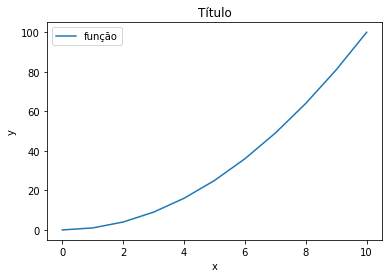

In [3]:
plt.figure()
plt.plot(X,Y,label='função')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Título')
plt.legend();

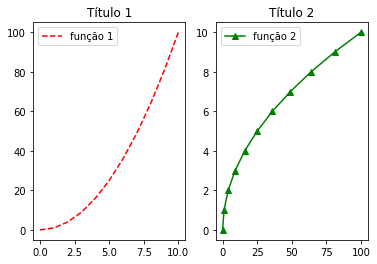

In [4]:
plt.subplot(1,2,1)
plt.plot(X,Y,'r--',label='função 1')
plt.title('Título 1')
plt.legend()
plt.subplot(1,2,2)
plt.plot(Y,X,'g^-',label='função 2')
plt.title('Título 2')
plt.legend()

De início o plot funcional é uma ferramenta relativamente fácil e rápida, mas com suas limitações. É muito bom para gráficos simples e até alguns mais rebuscados, mas para plots mais complexos, recomenda-se o Plot Orientado a Objeto.

## 5.2. Plot Orientado a Objeto

### 5.2.1. Ferramentas Básicas

A ideia principal da programação orientada a objeto é ter objetos os quais é possível aplicar funções e ações nos mesmos. A vantagem sobre o Plot Funcional se dá quando se deseja plotar diversas figuras. A plotagem se inicia criando um objeto figura ao invés de usá-lo como variável global, e então adiciona-se ações.

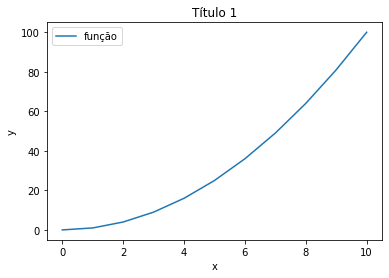

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X,Y,label='função')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Título 1')
ax.legend()

Ou utilizado a função `subplots`, que não precisa explicitar a adição de plots:

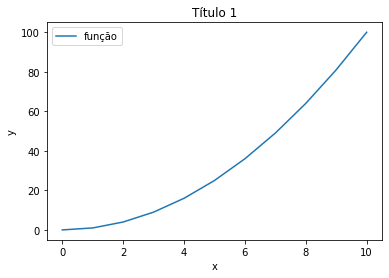

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(X,Y,label='função')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Título 1')
ax.legend()

O plot orientado à objeto permite a junção do plot com laços, o que garante mais autonomação na confecção de gráficos.

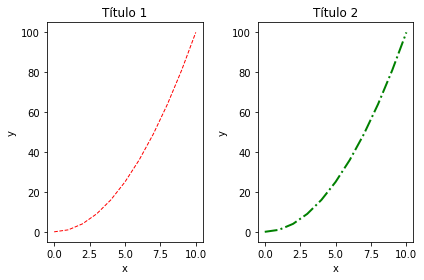

In [9]:
fig, axes = plt.subplots(1,2)

l = ['função 1','função 2']
c = ['r','g']
ls = ['--','-.']
lw = [1,2]
t = ['Título 1','Título 2']

for i in range(2):
    axes[i].plot(X,Y,label=l[i],color=c[i],linestyle=ls[i],linewidth=lw[i])
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(t[i])

fig.tight_layout()

### 5.2.2. Razão de Aspecto e DPI (_Dots per inch_)

Para definir a razão de aspecto e a qualidade da figura, basta utilizar os argumentos como `figsize` e `dpi`, os quais também funcionam em outros objetos, como `subplots`. 

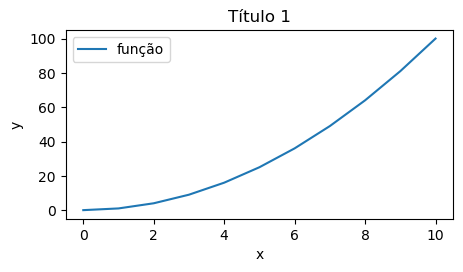

In [10]:
fig, ax = plt.subplots(1,1,figsize=(5,2.5),dpi=100)

ax.plot(X,Y,label='função')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Título 1')
ax.legend()

In [ ]:
ax.legend(loc=0) # Espço Ótimo
ax.legend(loc=1) # Direito Superior
ax.legend(loc=2) # Esquerdo Superior
ax.legend(loc=3) # Esquerdo Inferior
ax.legend(loc=4) # Direito Inferior

### 5.2.3. Salvando Figuras

Ao se salvar uma figura, temos a opção de escolher seu formato, bem como, sua qualidade.

In [ ]:
fig.savefig('abacate.jpg',dpi=100)

In [ ]:
fig.savefig('abacate.eps') #Não precisa de dpi, uma vez que a imagem é vetorizada.

### 5.2.4. Formatação de Texto :  _fontsize_, _font family_ , $\LaTeX$ e outros

Muitas vezes, queremos que a figura seja apresentável e tenha um formato padrão. Por isso, devemos sempre se preocurar com o texto formatado e configurações padronizadas. Matplotlib possui um forte suporte em $\LaTeX$. Para escrever expressões matemáticas, usar um _raw string_ e cifrões. ex: r'\alpha'.

In [ ]:
fig, ax = plt.subplots(1,1)

Y1 = (X)**1.5

ax.plot(X,Y,label=r'$\alpha$ = $x^2$')
ax.plot(X,Y1,label=r'$\alpha$ = $x^{1.5}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Título 1')
ax.legend()

Podemos também alterar a configuração global das figuras, alterando todos os elementos de texto de todas as figuras. Para isso, usamos `rc.Params.update`.

In [ ]:
mpl.rcParams.update({'font.size': 15, 'font.family': 'serif'})

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

Y1 = X**1.5

ax.plot(X,Y,label=r'$\alpha$ = $x^2$')
ax.plot(X,Y1,label=r'$\alpha$ = $x^{1.5}$')
ax.set_xlabel('x')
ax.set_ylabel(r'$\alpha$')
ax.set_title('Título 1')
ax.legend();

Podemos também pedir que o $\LaTeX$ renderize o texto para nós.

In [12]:
mpl.rcParams.update({'font.size': 18, 'text.usetex': True})

### 5.2.5 Cores, Espessuras e Tipos de Linha 

O módulo `matplotlib` possui um suporte ao MatLab para a edição das linhas dos gráficos, caso se deseje plots rápidos, como visto abaixo:

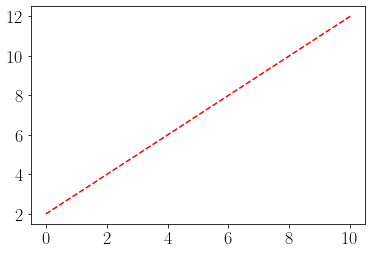

In [14]:
fig,ax = plt.subplots(1,1)
ax.plot(X,X+2,'r--')

No exemplo acima, `r` é interpretado como vermelho, e `--` é interpretado como linha tracejada. Apesar de em muitos casos não precisarmos de mais de oito cores (`b`,`g`,`r`,`c`,`m`,`y`,`b`,`w`,`k`), _Python_ te da a liberdade de escolher a cor que desejar na escala RGB, apenas informando seu código na base hexagonal. Pode-se consultar as cores aqui: https://cloford.com/resources/colours/500col.htm

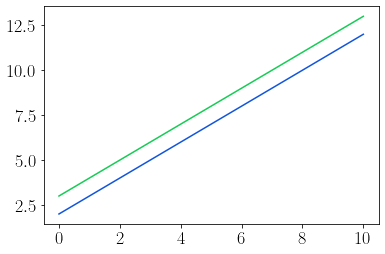

In [15]:
fig, ax = plt.subplots()

ax.plot(X, X+2, color="#1155dd")
ax.plot(X, X+3, color="#15cc55")        

Para a escolha dos estilos de linha,espessuras de linha, marcadores e tamanho de marcadores, basta usarmos os seguintes comandos, respectivamente: `linestyle` (ou `ls`), `linewidth` (ou `lw`), `marker`, `markersize`. Abaixo, a aplicação da formatação (conforme apresentado anteriormente, será feito um laço determinístico a fim de evitar multiplas linhas) :

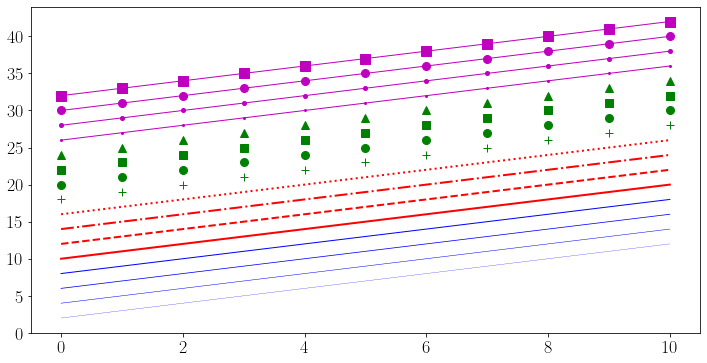

In [16]:
fig, ax = plt.subplots(1,1,figsize = (12,6))

clr  = ['b']*4 + ['r']*4 + ['g']*4 + ['m']*4
lwdh = [0.25,0.5,0.75,1.00] + [2]*4 + [0]*4 + [1]*4
mrks_size = [0]*8 + [8]*4 + [2,4,8,10]
mrks = ['.']*8 + ['+','o','s','^'] + ['o','o','o','s'] 
lsty = ['-']*4 + ['-','--','-.',':'] + ['-']*4 + ['-']*4

for i in range(16):
    ax.plot(X,X+(i+1)*2,color=clr[i],lw=lwdh[i],marker=mrks[i],ls=lsty[i],markersize=mrks_size[i])

Compare com o código sem o _loop_:

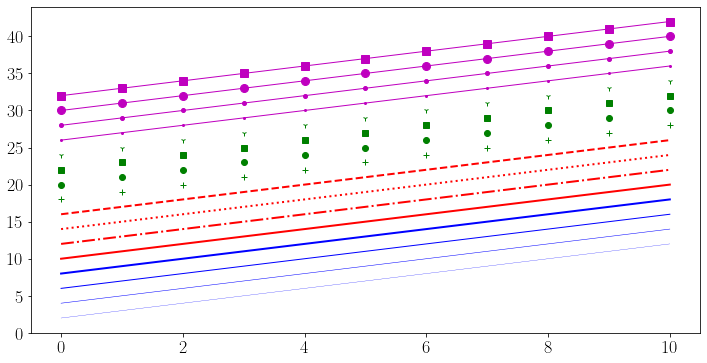

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(X, X+2, color='b', lw=0.25)
ax.plot(X, X+4, color='b', lw=0.50)
ax.plot(X, X+6, color='b', lw=1.00)
ax.plot(X, X+8, color='b', lw=2.00)
ax.plot(X, X+10, color='r', lw=2, ls='-')
ax.plot(X, X+12, color='r', lw=2, ls='-.')
ax.plot(X, X+14, color='r', lw=2, ls=':')
ax.plot(X, X+16, color='r', lw=2, ls='--')
ax.plot(X, X+18, color='g', lw=0, ls='-', marker='+')
ax.plot(X, X+20, color='g', lw=0, ls='-', marker='o')
ax.plot(X, X+22, color='g', lw=0, ls='-', marker='s')
ax.plot(X, X+24, color='g', lw=0, ls='-', marker='1')
ax.plot(X, X+26, color='m', lw=1, ls='-', marker='o', markersize=2)
ax.plot(X, X+28, color='m', lw=1, ls='-', marker='o', markersize=4)
ax.plot(X, X+30, color='m', lw=1, ls='-', marker='o', markersize=8)
ax.plot(X, X+32, color='m', lw=1, ls='-', marker='s', markersize=8)

### 5.2.6. Formatação do eixo

Quando confeccionamos gráficos, queremos muitas vezes apenas uma parte dos dados. Assim, os métodos `set_xlim` e `set_ylim` vem muito à acresecentar, uma vez que permitem uma visualização mais limpa, o método `axis('tight')` faz uma limitação automática da figura. 

NameError: name 'Y1' is not defined

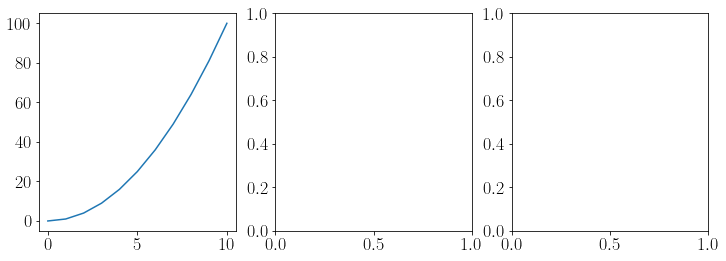

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(X,Y)
ax[0].plot(X,Y1)
ax[0].set_title('Limites Padrões')

ax[1].plot(X,Y)
ax[1].plot(X,Y1)
ax[1].axis('tight')
ax[1].set_title('Automaticamente limitados')

ax[2].plot(X,Y)
ax[2].plot(X,Y1)
ax[2].set_ylim([0, 10])
ax[2].set_xlim([1, 5])
ax[2].set_title('Limites Estabelecidos');

Usa-se `set_axhline` para linhas horizontais e `set_axvline` para linhas verticais. As linhas de tais comandos são infinitas, portanto, não precisam ser limitadas

NameError: name 'Y1' is not defined

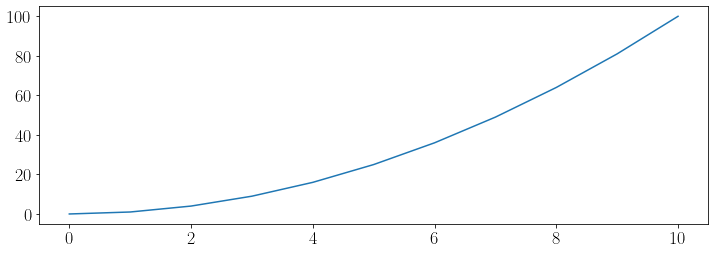

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(X,Y)
ax.plot(X,Y1)
ax.axhline(0,color='k')
ax.axvline(0,color='k');

#### 5.2.6.1. Escala 

É possível apresentar um gráfico em uma diferente escala utilizand o método `set_xscale` ou `set_yscale`.

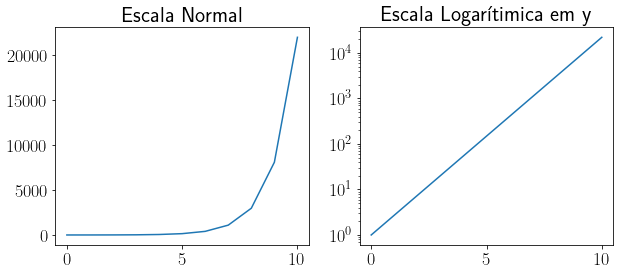

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(X,np.exp(X))
axes[0].set_title('Escala Normal')

axes[1].plot(X, np.exp(X))
axes[1].set_yscale('log')
axes[1].set_title('Escala Logarítimica em y');

#### 5.2.6.2. Riscos e _grids_

Podemos determinar quais riscos aparecerão em nosso gráfico usando o método `set_xticks` e `set_yticks`, sendo os riscos dispostos nos lugares em o valor numérico é dado. O _grid_ de um gráfico é definido pelo método `grid`.

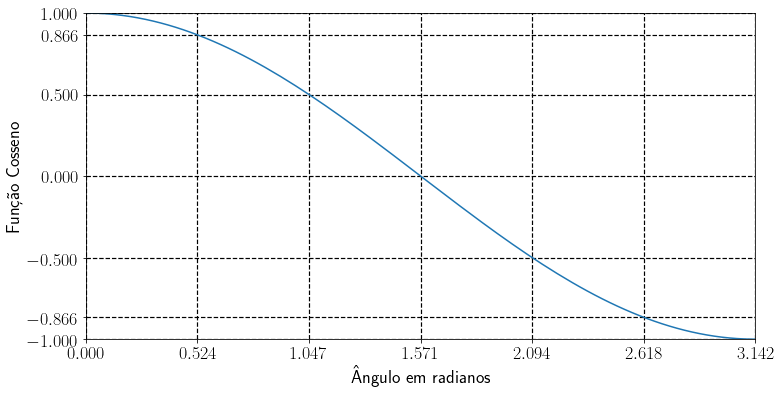

In [24]:
fig,ax = plt.subplots(1,1,figsize=(12,6))

ANGS = np.r_[0:2*np.pi:180j]
COS  = np.cos(ANGS)

ax.plot(ANGS,COS)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3,5*np.pi/6,np.pi])
ax.set_yticks([1,(3)**0.5/2,1/2,0,-(3)**0.5/2,-1/2,-1]);
ax.set_xlim([0,np.pi])
ax.set_ylim([-1,1])
ax.grid(ls='--',lw='1.2',color='k')
ax.set_xlabel('Ângulo em radianos')
ax.set_ylabel('Função Cosseno');

Para alterar o que o valor numérico por um simbolo correspondente ou até mesmo outro valor,usa-se `set_xticklabels` e `set_yticklabels`.

In [25]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(ANGS,COS)

ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,2*np.pi/3,5*np.pi/6,np.pi])
ax.set_xticklabels([0,r'$\dfrac{\pi}{6}$',r'$\dfrac{\pi}{3}$',r'$\dfrac{\pi}{2}$',r'$\dfrac{2\pi}{3}$',r'$\dfrac{5\pi}{6}$',r'$\pi$'])

ax.set_yticks([1,(3)**0.5/2,1/2,0,-(3)**0.5/2,-1/2,-1])
ax.set_yticklabels([1,r'$\sqrt{3}/2$',r'$1/2$',0,r'$-\sqrt{3}/2$',r'$-1/2$',-1])
ax.set_xlim([0,np.pi])
ax.set_ylim([-1,1])
ax.grid(ls='--',lw='1.2',color='k')
ax.set_xlabel('Ângulo em radianos')
ax.set_ylabel('Função Cosseno');

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f674a47fd40> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$\\\\dfrac{\\\\pi}{6}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/pedro/.cache/matplotlib/tex.cache/cd7ed9efc37a051baca3da12942fc5bf.tex
LaTeX2e <2018-12-01>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file cd7ed9efc37a051baca3da12942fc5bf.aux.
(/usr/share/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
<recently read> \dfrac 
                       
l.14 ...ze{18.000000}{22.500000}{\sffamily $\dfrac
                                                  {\pi}{6}$}
No pages of output.
Transcript written on cd7ed9efc37a051baca3da12942fc5bf.log.




RuntimeError: latex was not able to process the following string:
b'$\\\\dfrac{\\\\pi}{6}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Arch Linux) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/pedro/.cache/matplotlib/tex.cache/cd7ed9efc37a051baca3da12942fc5bf.tex
LaTeX2e <2018-12-01>
(/usr/share/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/share/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./cd7ed9efc37a051baca3da12942fc5bf.aux)
(/usr/share/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
<recently read> \dfrac 
                       
l.14 ...ze{18.000000}{22.500000}{\sffamily $\dfrac
                                                  {\pi}{6}$}
No pages of output.
Transcript written on cd7ed9efc37a051baca3da12942fc5bf.log.




<Figure size 864x576 with 1 Axes>

#### 5.2.6.3. Eixos gêmeos (_twins axes_)

As vezes, é desejado se apresentar um gráfico com o mesmo domínio, mas de contra domínios diferentes. Em _Python_, o método `twin_axes` permite tal formatação.

In [27]:
%matplotlib
fig,ax1 = plt.subplots(1,1)

X = np.r_[0:10:100j]

ax1.plot(X, np.sin(X),color='blue')
ax1.set_ylabel('Função Seno',color='b')

ax1.tick_params(axis='y',labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(X,np.exp(X),color='r')
ax2.set_ylabel('Função Exponencial',color='r')
ax2.tick_params(axis='y',labelcolor='r')

Using matplotlib backend: Qt5Agg


_Links_ para aprofundamento dos estudos:

* http://www.matplotlib.org - O próprio site do módulo.
* http://matplotlib.org/gallery.html - Galeria de diversas bibliotecas com diversos projetos de plot.
* http://www.loria.fr/~rougier/teaching/matplotlib - Bom Tutorial de Matplotlib.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Outra referência.